In [16]:
import pickle

with open('./results/training_validation_best_models_paths/training_results.pickle', 'rb') as file:
    training_results = pickle.load(file)
    
training_results

{'GCN_masked_flux': ('./results/saved_GNNs/Masked/GCN/Fluxes/Model_GCN_04-03-2023_18h_35min_best_ValAcc_0.9793420045906657_epoch_0.pt',
  [0.7126243305279265,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479,
   0.998928844682479],
  [0.9793420045906657,
   0.9793420045906657,
   0.9793420045906657,
   0.9793420045906657,


In [17]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
print(f"{device = }")

GCN_masked_flux = torch.load(training_results['GCN_masked_flux'][0])
GCN_masked_concen = torch.load(training_results['GCN_masked_concen'][0])
GCN_masked_concen_plus_flux  = torch.load(training_results['GCN_masked_concen_plus_flux'][0])
GAT_masked_flux = torch.load(training_results['GAT_masked_flux'][0])
GAT_masked_concen = torch.load(training_results['GAT_masked_concen'][0])
GAT_masked_concen_plus_flux = torch.load(training_results['GAT_masked_concen_plus_flux'][0])
GIN_masked_flux = torch.load(training_results['GIN_masked_flux'][0])
GIN_masked_concen = torch.load(training_results['GIN_masked_concen'][0])
GIN_masked_concen_plus_flux = torch.load(training_results['GIN_masked_concen_plus_flux'][0])


test_loader_MASKED_loader_only_Fluxes        = torch.load("./results/dataloaders/MASKED_loader_only_Fluxes.pt").get_test_loader()
test_loader_MASKED_loader_only_Concen        = torch.load("./results/dataloaders/MASKED_loader_only_Concen.pt").get_test_loader()
test_loader_MASKED_loader_Concen_plus_Fluxes = torch.load("./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt").get_test_loader()

device = 'cuda:0'


In [18]:
##GCN
GCN_base_fpr_F,  GCN_mean_tprs_F, GCN_tprs_lower_F,   GCN_tprs_upper_F,  GCN_mean_auc_F,  GCN_std_auc_F  = get_ROC_parameters(GCN_masked_flux, test_loader_MASKED_loader_only_Fluxes)
GCN_base_fpr_C,  GCN_mean_tprs_C, GCN_tprs_lower_C,   GCN_tprs_upper_C,  GCN_mean_auc_C,  GCN_std_auc_C  = get_ROC_parameters(GCN_masked_concen, test_loader_MASKED_loader_only_Concen)
GCN_base_fpr_CF, GCN_mean_tprs_CF, GCN_tprs_lower_CF, GCN_tprs_upper_CF, GCN_mean_auc_CF, GCN_std_auc_CF = get_ROC_parameters(GCN_masked_concen_plus_flux, test_loader_MASKED_loader_Concen_plus_Fluxes)
#GAT
GAT_base_fpr_F,  GAT_mean_tprs_F, GAT_tprs_lower_F,   GAT_tprs_upper_F,  GAT_mean_auc_F,  GAT_std_auc_F  = get_ROC_parameters(GAT_masked_flux, test_loader_MASKED_loader_only_Fluxes)
GAT_base_fpr_C,  GAT_mean_tprs_C, GAT_tprs_lower_C,   GAT_tprs_upper_C,  GAT_mean_auc_C,  GAT_std_auc_C  = get_ROC_parameters(GAT_masked_concen, test_loader_MASKED_loader_only_Concen)
GAT_base_fpr_CF, GAT_mean_tprs_CF, GAT_tprs_lower_CF, GAT_tprs_upper_CF, GAT_mean_auc_CF, GAT_std_auc_CF = get_ROC_parameters(GAT_masked_concen_plus_flux, test_loader_MASKED_loader_Concen_plus_Fluxes)
#GIN
GIN_base_fpr_F,  GIN_mean_tprs_F, GIN_tprs_lower_F,   GIN_tprs_upper_F,  GIN_mean_auc_F,  GIN_std_auc_F  = get_ROC_parameters(GIN_masked_flux, test_loader_MASKED_loader_only_Fluxes)
GIN_base_fpr_C,  GIN_mean_tprs_C, GIN_tprs_lower_C,   GIN_tprs_upper_C,  GIN_mean_auc_C,  GIN_std_auc_C  = get_ROC_parameters(GIN_masked_concen, test_loader_MASKED_loader_only_Concen)
GIN_base_fpr_CF, GIN_mean_tprs_CF, GIN_tprs_lower_CF, GIN_tprs_upper_CF, GIN_mean_auc_CF, GIN_std_auc_CF = get_ROC_parameters(GIN_masked_concen_plus_flux, test_loader_MASKED_loader_Concen_plus_Fluxes)


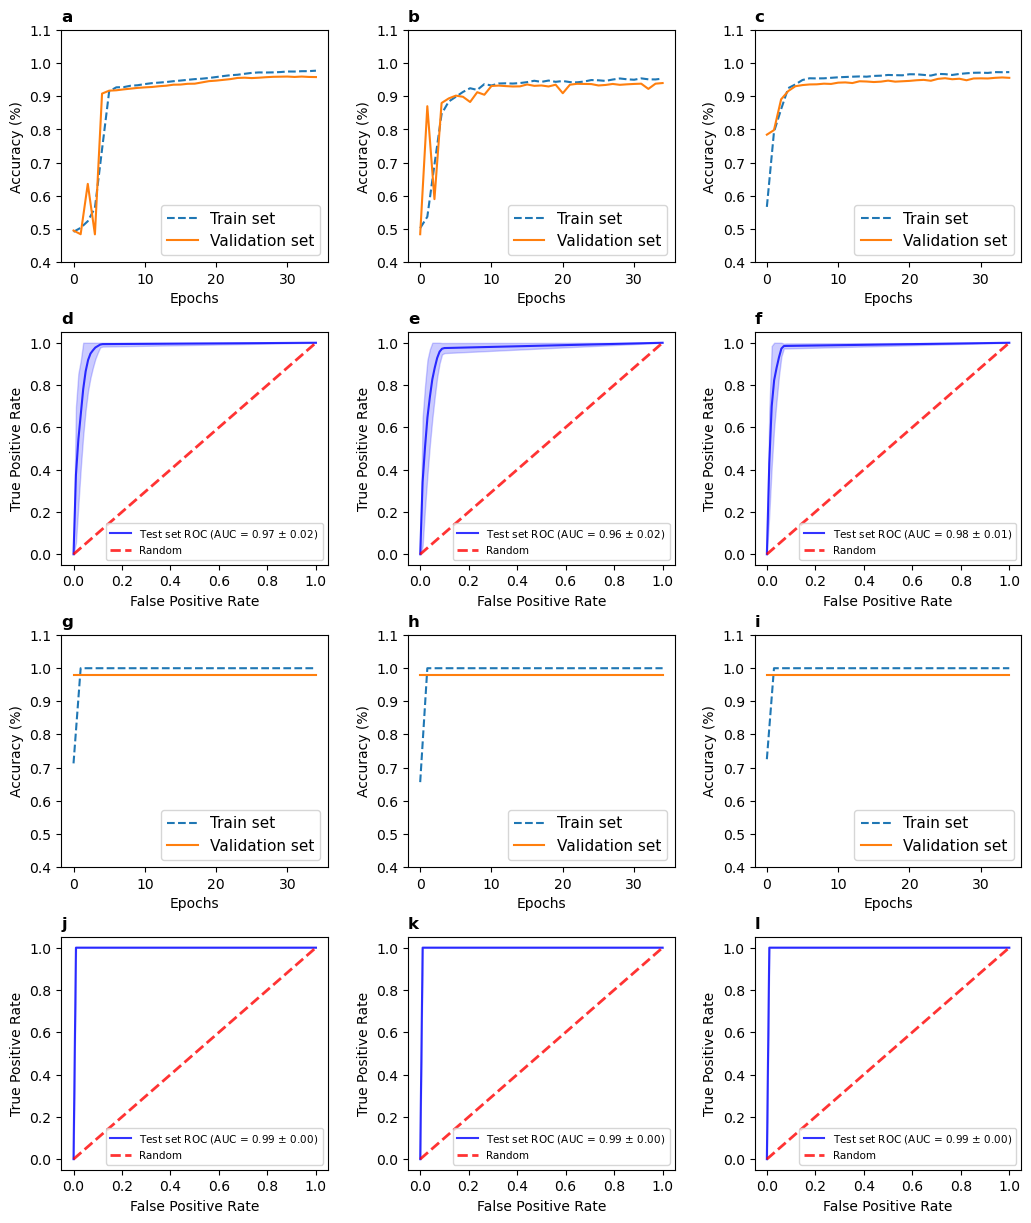

In [20]:
fig = plt.figure(figsize=(16,12))
ax0 = plt.subplot2grid((4, 3), (0, 0), colspan=1)
ax1 = plt.subplot2grid((4, 3), (1, 0), colspan=1)
ax2 = plt.subplot2grid((4, 3), (0, 1), colspan=1)

ax3 = plt.subplot2grid((4, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((4, 3), (0, 2), colspan=1)
ax5 = plt.subplot2grid((4, 3), (1, 2), colspan=1)


ax6 = plt.subplot2grid((4, 3), (2, 0), colspan=1)
ax7 = plt.subplot2grid((4, 3), (3, 0), colspan=1)
ax8 = plt.subplot2grid((4, 3), (2, 1), colspan=1)


ax9 = plt.subplot2grid((4, 3), (3, 1), colspan=1)
ax10 = plt.subplot2grid((4, 3), (2, 2), colspan=1)
ax11 = plt.subplot2grid((4, 3), (3, 2), colspan=1)

#ax12 = plt.subplot2grid((4, 3), (2, 2), colspan=1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=.7, top=1.05, wspace=0.3, hspace=0.3)    

# FLUX
put_Learning_curve(training_results['GCN_masked_flux'][1], training_results['GCN_masked_flux'][2], ax6, 'g')
put_Learning_curve(training_results['GAT_masked_flux'][1], training_results['GAT_masked_flux'][2], ax8, 'h')
put_Learning_curve(training_results['GIN_masked_flux'][1], training_results['GIN_masked_flux'][2], ax10, 'i')
put_ROC_in_subplot(GCN_base_fpr_F,  GCN_mean_tprs_F, GCN_tprs_lower_F,   GCN_tprs_upper_F,  GCN_mean_auc_F,  GCN_std_auc_F,
                   ax7, xlabel = 'False Positive Rate', letter = 'j')
put_ROC_in_subplot(GAT_base_fpr_F,  GAT_mean_tprs_F, GAT_tprs_lower_F,   GAT_tprs_upper_F,  GAT_mean_auc_F,  GAT_std_auc_F ,
                   ax9, xlabel = 'False Positive Rate', letter = 'k')
put_ROC_in_subplot(GIN_base_fpr_F,  GIN_mean_tprs_F, GIN_tprs_lower_F,   GIN_tprs_upper_F,  GIN_mean_auc_F,  GIN_std_auc_F ,
                   ax11, xlabel = 'False Positive Rate', letter = 'l')

#Concentration
put_Learning_curve(training_results['GCN_masked_concen'][1], training_results['GCN_masked_concen'][2], ax0, 'a')
put_Learning_curve(training_results['GAT_masked_concen'][1], training_results['GAT_masked_concen'][2], ax2, 'b')
put_Learning_curve(training_results['GIN_masked_concen'][1], training_results['GIN_masked_concen'][2], ax4, 'c')

put_ROC_in_subplot(GCN_base_fpr_C,  GCN_mean_tprs_C, GCN_tprs_lower_C,   GCN_tprs_upper_C,  GCN_mean_auc_C,  GCN_std_auc_C,
                   ax1, xlabel = 'False Positive Rate', letter = 'd')
put_ROC_in_subplot(GAT_base_fpr_C,  GAT_mean_tprs_C, GAT_tprs_lower_C,   GAT_tprs_upper_C,  GAT_mean_auc_C,  GAT_std_auc_C ,
                   ax3, xlabel = 'False Positive Rate', letter = 'e')
put_ROC_in_subplot(GIN_base_fpr_C,  GIN_mean_tprs_C, GIN_tprs_lower_C,   GIN_tprs_upper_C,  GIN_mean_auc_C,  GIN_std_auc_C ,
                   ax5, xlabel = 'False Positive Rate', letter = 'f')


plt.savefig('./results/figures/Figure_2.png',
        bbox_inches ="tight",
        pad_inches = 0.01,
        transparent = False, dpi=400)
plt.show()
